# Tesco Grocery 1.0, a large-scale dataset of grocery purchases in London

Tesco is a British multinational grocery and general merchandise retailer. Tesco has a loyalty club in that customers apply for a Clubcard that is used for online and in-store purchases, and they may get some discount vouchers or redeem prizes. In this research, the in-store purchases in the 411 Tesco shops within the boundaries of Greater London during the entire year of 2015 are considered.
There is some fine-grained geographical information included in Tesco Grocery, so it's a good idea to link food consumption data to any attribute that can be measured at the level of statistical census areas.


As you can see, most governments have problems with their budget, but trying many solutions to reduce the budget deficit does not help effectively. The importance of this dataset appears in such situations. One of the most significant parts of the government's budget is waste in healthcare. What happens if governments can plan on reducing the healthcare budget by reduction of medicine import and production? So, geometrical information on medical status is essential for governments and people who desire to selection of a city and living area.


Nowadays, many hospitals and clinics store patients' information in digital means, and as a result, this approach improves their service quality. But this approach works for individuals, not for governments. In simple language, such pieces of information are too fine-grained, but there is not enough coarse-grained data to use in statistics or with census data in the big picture. This paper aims to gather and analyze coarse-grained information to show how important such data is. From research done in 2019 by the Global Burden of Diseases, Injuries, and Risk Factors Study (GBD), we have a standardized and comprehensive assessment of the magnitude of risk factor exposure. In 1990 diabetes was the 11th most influential risk factor in the death of people, but in 2019 it became the third risk factor. Also, this research shows that in Iran, the high blood sugar factor was the 8th factor in 1990, but in 2019 it became the third one. Since knowing this information, we figure out the importance of diabetic data in a coarse-grained manner. Also, many kinds of research in Medical Sciences show that doing exercises and having a healthy diet provides strong protection against diabetes. In this work, we are gathering a dataset to investigate this relationship.





## Previous Works

Several studies mined grocery sales data to build  recommender systems or similar thing, but there are a few ones that analyze the relation ship between the sales in an area and healty parameters of that area. As author mentioned: The nutrient composition of ready-made meals was studied18, yet that represented potential availability of nutrients given the lack of sales data. Only recently, Instacart–a company that delivers groceries from local stores–published a dataset of 3 million grocery orders from more than 200,000 users19, yet neither geo-location information nor nutritional information for these orders is available.

## Setup Environment

In this part we will install required packages. As we have many geometrical datas, we will use geopandas library to work with geographical data.

In [ ]:
#@title Install Python Packages

from google.colab import drive
from tqdm.notebook import trange, tqdm
from IPython.display import clear_output

!pip install geopandas

clear_output()
print("Geopandas installed successfully")

Geopandas installed successfully


In [ ]:
#@title Import Required Libraries

import json
from pathlib import Path
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
import pprint
import re

clear_output()
print("Done!")

Done!


## Loading the Dataset

First, we will describe the overall structure of datasets, and then do some data cleaning and preprocessing over them. The paper explained datasets terms very well: "The area is where the customer lives, and the **GTIN** is the Global Trade Item Number, which is used by companies to uniquely identify their trade items globally"


### Geographical Definitions and Information

The other important part of dataset is geographical data types. The authors aggregated each purchase record at area-level using a variety of geographical resolutions given by Office for National Statistics (ONS)


*   LSOA (Lower Super Output Area)
*   MSOA (Medium Super Output Area)
*   Ward
*   LA (Local Authority or Borough)

It is important to know the hierarchy of Census areas. So we refer to defenitions to get better understanding. So let's describe what is Output Areas (OAs). **Output Areas (OAs)** are ***the lowest level of geographical area*** for census statistics and were first created following the 2001 Census. Also, OAs are built from clusters of adjacent unit **POSTCODES** in the United Kingdom.

Now we define LSOA based on the [NHS](https://www.datadictionary.nhs.uk/nhs_business_definitions/lower_layer_super_output_area.html) website. So **LSOAs** are a geographic hierarchy designed to improve the reporting of small area statistics in England and Wales. They are ***built from groups of contiguous OAs*** and have been automatically generated to be as consistent in population size as possible, and typically contain from four to six


Since we have defined OAs and LSOAs, we can give a defintion for MSOAs based on [NHS](https://www.datadictionary.nhs.uk/nhs_business_definitions/middle_layer_super_output_area.html) website. **MSOAs** are ***built from groups of contiguous LSOAs***. The minimum population is 5000 and the mean is 7200.

So the we can say ward as an ancestor of MSOAs in the areas hierarchy. Alos Local Authority is the structure of local government varies from area to area in England.

In conclusion we can say each Borough (LA) consists of some Wards and each Ward includes some MSOAs and finally each MSOA constructed from a set of contiguous LAOAs.

In [ ]:
#@title Connect to Google Drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Load Food Information
base_path = '/content/drive/MyDrive/Datasets/TescoGrocery/'
food_cats_df = pd.read_csv(base_path+'food_categories.csv')
print("People Dataset Shape: ", food_cats_df.shape)

People Dataset Shape:  (67296, 2)


In [ ]:
food_cats_df.head(5)

,gtin,category
0,5074.0,fruit_veg
1,3264393.0,fruit_veg
2,10052341.0,fruit_veg
3,10074695.0,fruit_veg
4,10089002.0,fruit_veg


### Annual Area Based Grocery Info

Let's see some samples of data. Now we want to get some information about each column. As the [paper](https://join.skype.com/LeEEwtFZyiP4) mentioned, each of these dataset files contains aggregated information on food purchases, enriched with informationrom the census of each area. Also, the authors described that annual dataset files are a summarization of data for the entire 2015 year and there are separate files for each month's data. Inaddition, some columns are normalized by the data providers.

In this report we will concentrate on the annual datasets.

In [ ]:
#@title Loading Annual Area Based Grocery Dataset
area_base_path = '/content/drive/MyDrive/Datasets/TescoGrocery/area/'
lsoa_y = pd.read_csv(area_base_path+'year_lsoa_grocery.csv')
msoa_y = pd.read_csv(area_base_path+'year_msoa_grocery.csv')
ward_y = pd.read_csv(area_base_path+'year_osward_grocery.csv')
la_y = pd.read_csv(area_base_path+'year_borough_grocery.csv')

clear_output()
print('LSOA annual dataframw shape: ', lsoa_y.shape)
print('MSOA annual dataframw shape: ', msoa_y.shape)
print('Ward annual dataframw shape: ', ward_y.shape)
print('LA annual dataframw shape: ', la_y.shape)

LSOA annual dataframw shape:  (4833, 202)
MSOA annual dataframw shape:  (983, 202)
Ward annual dataframw shape:  (638, 202)
LA annual dataframw shape:  (33, 202)


#### Getting Some Insights from Per Area Purchase Data

In this part we want to see some samples and info from our joint purchase-area dataset. As mentioned in the paper the columns of annual and monthly purchase data for each area have same columns. So, we just show only for one of the LA areas(Borough) but we will analyze each area separately in the following sections.

In [ ]:
lsoa_y.head(5)

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E01000001,308.119047,35.0,150.0,250.0,400.0,900.0,266.851723,2.359404,97.218600,...,16033,1296.0,685.0,611.0,179.0,766.0,351.0,48.293981,0.13,9985.0
1,E01000002,313.517874,40.0,150.0,250.0,400.0,900.0,256.227843,2.833812,88.262314,...,7829,1156.0,616.0,540.0,197.0,656.0,303.0,47.398789,0.23,5061.0
2,E01000003,315.084751,35.0,150.0,250.0,400.0,1000.0,292.462262,2.763918,102.240558,...,15065,1350.0,713.0,637.0,152.0,850.0,348.0,48.360741,0.06,22843.0
3,E01000005,356.033437,38.0,150.0,280.0,450.0,1000.0,436.559315,2.554110,113.968805,...,25128,1121.0,604.0,517.0,294.0,675.0,152.0,35.611954,0.19,5912.0
4,E01000006,451.262063,36.0,180.0,325.0,500.0,1500.0,666.655869,7.744708,133.322097,...,5860,2040.0,1040.0,1000.0,563.0,1317.0,160.0,32.080392,0.15,13915.0


Let's see all column names

#### Columns Explanation
As we can see therer are several columns that illustrate the values of the 2.5th, 25th, 50th, 75th, and 97.5th percentiles in the format *suffix_perc{value}*. also measures are accompanied with their standard deviation in columns with *suffix_std*.
Also there are some notes on other columns. As authors described we will explain some of the columns that may need clarification in the following:


*   weight: Weight of the average food product, in grams.
*   volume: Volume of the average drink product, in liters.
*   energy: Nutritional energy of the average product, in kcals.
*   energy_density: Concentration of calories in the area’s average product, in kcals/gram
*   {nutrient}: Weight of {nutrient} in the average product, in grams. Possible nutrients are: carbs, sugar, fat, saturated fat, protein, fbre. Te count of carbs include sugars and the count of fats includes saturated fats.
*   h_nutrients_weight: Entropy of nutrients weight.
*   h_nutrients_weight_norm: Entropy of nutrients weight, normalized in [0,1].
*   f_{category}: Fraction of products of type {product_type} purchased.
*   h_category: Entropy of food product types.
*   representativeness_norm: The ratio between the number of unique customers in the area and the number of residents as measured by the census
*   transaction_days: Number of unique dates in which at least one purchase has been made by one of the residents in the area.
*   num_transactions:  Total number of products purchased by Clubcard owners who are resident in the area.
*   man_day:  Cumulative number of man-days of purchase (number of distinct days a customer has purchased something, summed all individual customers).


In [ ]:
pp = pprint.PrettyPrinter(width=256, compact=True)
print("LSOA annual dataset columns: ")
pp.pprint(list(lsoa_y.columns))

LSOA annual dataset columns: 
['area_id', 'weight', 'weight_perc2.5', 'weight_perc25', 'weight_perc50', 'weight_perc75', 'weight_perc97.5', 'weight_std', 'weight_ci95', 'volume', 'volume_perc2.5', 'volume_perc25', 'volume_perc50', 'volume_perc75', 'volume_perc97.5', 'volume_std',
 'volume_ci95', 'fat', 'fat_perc2.5', 'fat_perc25', 'fat_perc50', 'fat_perc75', 'fat_perc97.5', 'fat_std', 'fat_ci95', 'saturate', 'saturate_perc2.5', 'saturate_perc25', 'saturate_perc50', 'saturate_perc75', 'saturate_perc97.5', 'saturate_std',
 'saturate_ci95', 'salt', 'salt_perc2.5', 'salt_perc25', 'salt_perc50', 'salt_perc75', 'salt_perc97.5', 'salt_std', 'salt_ci95', 'sugar', 'sugar_perc2.5', 'sugar_perc25', 'sugar_perc50', 'sugar_perc75', 'sugar_perc97.5', 'sugar_std', 'sugar_ci95',
 'protein', 'protein_perc2.5', 'protein_perc25', 'protein_perc50', 'protein_perc75', 'protein_perc97.5', 'protein_std', 'protein_ci95', 'carb', 'carb_perc2.5', 'carb_perc25', 'carb_perc50', 'carb_perc75', 'carb_perc97.5', 'car

In [ ]:
lsoa_y.describe()

,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
count,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,...,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000
mean,371.573671,34.821362,155.787570,281.840368,461.903735,1123.311959,439.483033,5.739562,109.611387,12.675289,...,11209.397269,1792.697703,890.591558,902.106145,403.702255,1181.990482,207.004966,36.221621,0.325218,10167.031244
std,52.847517,5.109351,23.762588,42.463191,48.102601,244.317745,137.442201,3.727654,16.581778,3.113983,...,11253.713245,364.497779,199.136562,178.382182,131.871421,308.545341,82.817188,3.755610,0.628862,6630.080881
min,164.405101,11.000000,44.000000,52.000000,174.000000,610.000000,181.576666,1.066252,56.407704,3.500000,...,345.000000,614.000000,316.000000,298.000000,51.000000,346.000000,19.000000,25.015936,0.020000,125.000000
25%,334.434314,30.000000,150.000000,250.000000,425.000000,1000.000000,341.824963,3.047281,98.558263,11.000000,...,3157.000000,1577.000000,769.000000,801.000000,317.000000,988.000000,148.000000,33.642211,0.130000,5432.000000
50%,373.254063,35.000000,154.000000,296.000000,480.000000,1000.000000,412.819548,4.733618,107.994404,11.000000,...,7517.000000,1730.000000,855.000000,877.000000,385.000000,1124.000000,194.000000,35.822951,0.200000,8798.000000
75%,408.917176,40.000000,174.000000,300.000000,500.000000,1200.000000,508.675420,7.583435,119.148316,15.000000,...,15210.000000,1940.000000,970.000000,976.000000,472.000000,1305.000000,255.000000,38.466194,0.320000,13654.000000
max,745.264297,60.000000,400.000000,500.000000,1500.000000,3000.000000,1205.672178,60.807011,241.418412,25.450000,...,91782.000000,9551.000000,5138.000000,4413.000000,1789.000000,7548.000000,732.000000,55.253532,15.800000,91775.000000


In [ ]:
msoa_y.describe()

,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
count,983.000000,983.000000,983.000000,983.000000,983.00000,983.000000,983.000000,983.000000,983.000000,983.000000,...,983.000000,983.00000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,372.409822,34.830786,156.161292,282.749644,463.84944,1124.674059,442.232349,2.509952,110.020915,12.224601,...,55113.964395,8816.81587,4380.067141,4436.748728,1985.488301,5813.037640,1018.289929,36.115975,1.599674,8848.057579
std,47.894836,4.462452,20.566288,38.666642,41.02336,225.439970,122.908541,1.449309,13.865316,2.222797,...,50535.777959,1714.51910,914.400305,832.284913,574.961236,1349.059623,368.853884,3.210194,1.861376,5137.854481
min,250.586352,20.000000,52.000000,165.000000,340.00000,800.000000,238.665267,0.523904,76.370619,9.000000,...,3415.000000,5422.00000,2630.000000,2707.000000,609.000000,3050.000000,226.000000,27.318187,0.300000,288.324421
25%,336.951305,30.000000,150.000000,250.000000,430.00000,1000.000000,353.743912,1.375133,101.060585,11.000000,...,16664.500000,7671.00000,3779.000000,3866.500000,1585.000000,4897.500000,756.000000,33.904052,0.715000,4958.203822
50%,374.390390,35.000000,154.000000,300.000000,480.00000,1000.000000,418.590059,2.071962,108.083054,11.000000,...,41046.000000,8587.00000,4255.000000,4346.000000,1894.000000,5592.000000,949.000000,35.715132,1.150000,7720.000000
75%,406.809828,40.000000,173.850000,305.000000,500.00000,1200.000000,504.183337,3.515936,117.590665,15.000000,...,77265.000000,9682.00000,4829.000000,4890.000000,2288.000000,6507.500000,1229.000000,38.014956,1.750000,12197.183484
max,520.723547,48.400000,200.000000,400.000000,600.00000,2500.000000,1005.440249,12.795131,167.727804,23.000000,...,303606.000000,18263.00000,9876.000000,8387.000000,4897.000000,14490.000000,2784.000000,45.464540,22.440000,26905.405405


In [ ]:
ward_y.describe()

,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,...,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,370.403700,34.739871,155.693417,280.932288,462.344436,1115.929937,437.927454,2.080260,109.596292,12.311855,...,84840.105016,13584.529781,6748.598746,6835.931034,3059.145768,8956.451411,1568.932602,36.239821,2.464702,8646.336769
std,47.205641,4.363428,20.493075,37.755210,40.306720,214.836827,121.707599,1.272304,13.438130,2.141406,...,77049.894940,3144.974291,1613.569248,1569.885188,991.001546,2292.175452,570.706365,3.143814,2.537646,5142.582677
min,255.955618,25.000000,52.000000,165.000000,350.000000,800.000000,238.926947,0.465398,75.539931,9.200000,...,746.000000,802.000000,493.000000,309.000000,95.000000,646.000000,55.000000,28.666428,0.060000,180.991736
25%,335.294405,30.000000,150.000000,250.000000,425.500000,1000.000000,351.949830,1.097334,100.561409,11.000000,...,23734.750000,11440.500000,5651.000000,5814.500000,2406.500000,7349.750000,1206.000000,33.978191,1.150000,4835.880577
50%,371.163906,35.000000,153.000000,295.000000,475.000000,1000.000000,415.136158,1.627546,107.128728,11.000000,...,62435.500000,13637.000000,6758.500000,6842.000000,2979.000000,9045.000000,1482.500000,35.823344,1.820000,7448.589192
75%,406.306485,40.000000,173.000000,300.000000,500.000000,1200.000000,495.707252,2.906313,116.955578,15.000000,...,120147.750000,15770.000000,7851.000000,7930.500000,3646.250000,10404.250000,1803.250000,38.308101,2.792500,11754.247649
max,513.556945,45.000000,200.000000,360.000000,520.000000,2000.000000,984.224533,9.479045,165.911893,20.000000,...,411452.000000,27615.000000,14694.000000,12921.000000,7267.000000,21657.000000,3563.000000,48.360741,29.040000,29474.418605


In [ ]:
la_y.describe()

,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,3.300000e+01,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,373.898533,35.954545,159.969697,284.581818,469.212121,1113.939394,434.344901,0.422137,109.808642,11.848485,...,1.641727e+06,262634.242424,130472.909091,132161.333333,59143.484848,173158.060606,30332.696970,36.253457,47.650909,7286.526000
std,40.721303,4.051164,16.896088,32.326396,39.005414,175.605015,96.926163,0.241992,10.405026,1.598851,...,1.139058e+06,73791.635356,36906.723911,37158.195707,19011.948712,49417.623844,11368.467277,2.498356,32.714349,3887.905684
min,295.330271,28.000000,120.000000,215.000000,400.000000,1000.000000,300.762891,0.171615,95.006632,10.100000,...,1.038830e+05,6687.000000,3697.000000,2990.000000,1018.000000,4349.000000,1320.000000,31.514726,2.900000,2166.664447
25%,348.420414,32.500000,150.000000,250.000000,450.000000,1000.000000,359.841786,0.271506,102.882176,11.000000,...,7.342320e+05,227507.000000,113683.000000,113824.000000,46242.000000,146237.000000,23417.000000,34.858641,26.820000,4390.319972
50%,374.737951,37.000000,165.000000,300.000000,500.000000,1000.000000,425.267620,0.323224,106.446426,11.000000,...,1.485336e+06,268626.000000,134797.000000,135020.000000,61120.000000,179854.000000,28265.000000,35.934276,37.640000,5793.247521
75%,405.993196,40.000000,175.000000,305.000000,500.000000,1160.000000,486.498044,0.487412,114.933771,12.500000,...,2.612931e+06,319477.000000,154118.000000,159504.000000,70644.000000,211354.000000,36907.000000,37.195582,56.380000,10687.248787
max,450.349903,40.000000,180.000000,325.000000,500.000000,1500.000000,718.157462,1.001520,136.703561,15.000000,...,4.131210e+06,380070.000000,186357.000000,195765.000000,93166.000000,237511.000000,56804.000000,43.910124,150.140000,15268.926174


### Loading Geographical Info

In [ ]:
#@title Loading London Geographical Dataset

location_df = pd.read_csv(base_path+'london_pcd2geo_2015.csv')

print('London goe dataframe shape: ', location_df.shape)

London goe dataframe shape:  (189962, 8)


In [ ]:
location_df.head(5)

,pcd,lat,long,oa11,lsoa11,msoa11,osward,oslaua
0,BR1 1AA,51.401546,0.015415,E00003264,E01000675,E02000144,E05000109,E09000006
1,BR1 1AB,51.406333,0.015208,E00003255,E01000676,E02000134,E05000109,E09000006
2,BR1 1AD,51.400057,0.016715,E00003264,E01000675,E02000144,E05000109,E09000006
3,BR1 1AE,51.404543,0.014195,E00003266,E01000677,E02000144,E05000109,E09000006
4,BR1 1AF,51.401392,0.014948,E00003264,E01000675,E02000144,E05000109,E09000006


### Loading London Citizens Health Related Info

In [ ]:
#@title Loading Health Data
health_path = '/content/drive/MyDrive/Datasets/TescoGrocery/health/'
child_obs_la = pd.read_csv(health_path+'child_obesity_london_borough_2015-2016.csv')
child_obs_ward = pd.read_csv(health_path+'child_obesity_london_ward_2013-2014.csv')
lnd_obs_la = pd.read_csv(health_path+'london_obesity_borough_2012.csv')
obs_hosptialization_la = pd.read_csv(health_path+'obesity_hospitalization_borough_2016.csv')
diabetes_ward = pd.read_csv(health_path+'diabetes_estimates_osward_2016.csv')

lnd_obs_la.rename(columns={'oslaua': 'area_id'}, inplace=True)


print('Childs Obesity in London LA dataframe shape: ', child_obs_la.shape)
print('Childs Obesity in London Ward dataframe shape: ', child_obs_ward.shape)
print('Obesity in London LA dataframw shape: ', lnd_obs_la.shape)
print('Obesity hospitalization on London LA dataframw shape: ', obs_hosptialization_la.shape)
print('Diabetes estimation dataframe shape: ', diabetes_ward.shape)


Childs Obesity in London LA dataframe shape:  (32, 7)
Childs Obesity in London Ward dataframe shape:  (633, 7)
Obesity in London LA dataframw shape:  (33, 5)
Obesity hospitalization on London LA dataframw shape:  (33, 5)
Diabetes estimation dataframe shape:  (637, 4)


#### Getting Some Insight About Health Data

The following data frames illustrates the fraction obese and overweight in primary schools of london in Ward and LA areas. The measured targets were in Reception class (aged 4 to 5) and year 6 class (aged 10 to 11). The sampeling held by the English National Health Service (NHS) in the 2013-2014 year.

In [ ]:
child_obs_la.head(5)

,area_id,number_reception_measured,number_y6_measured,prevalence_overweight_reception,prevalence_overweight_y6,prevalence_obese_reception,prevalence_obese_y6
0,E09000002,3561,3054,11.710194,14.898494,13.732098,28.487230
1,E09000003,4177,3639,10.988748,14.811761,8.163754,19.620775
2,E09000004,3184,2697,14.572864,15.684093,10.992462,22.617723
3,E09000005,3818,3540,11.157674,15.451977,10.555265,24.152542
4,E09000006,3815,3220,12.581914,13.354037,8.020970,16.180124


Also in other study the pervelance of overweight and obese adults collected by the Active People Survey in 2012. The provided data is fraction of overweight and obese individuala among a statistical sample of LA residents.

In [ ]:
lnd_obs_la.head(5)

,area_id,f_healthy_weight,f_overweight,f_obese,weighted_sample
0,E09000001,36.5,30.5,31.4,20
1,E09000002,33.4,31.9,31.6,409
2,E09000003,42.1,35.2,20.5,862
3,E09000004,33.5,43.1,23.0,589
4,E09000005,43.9,34.9,19.5,712


In [ ]:
obs_hosptialization_la.head(5)

,area_id,total_hospitalizations,total_bariatric,prevalence_hospitalizations,prevalence_bariatric
0,E09000001,na,na,na,na
1,E09000002,34,25,0.018,0.014
2,E09000003,94,61,0.026,0.017
3,E09000004,82,51,0.035,0.022
4,E09000005,105,70,0.036,0.022


In [ ]:
diabetes_ward.head(5)

,area_id,gp_patients,gp_patients_diabetes,estimated_diabetes_prevalence
0,E05000026,13136,1068,8.1
1,E05000027,8954,631,7.0
2,E05000028,12032,958,8.0
3,E05000029,8853,700,7.9
4,E05000030,8813,640,7.3


## Data Visualization

In this section we will get some more insights about given dataset. Then we will discuss on improving data by doing some feature engineering and data cleaning


Now first let's see provided food categories and how many items exists in each category.

In [ ]:
cat_labels = food_cats_df['category'].value_counts().index

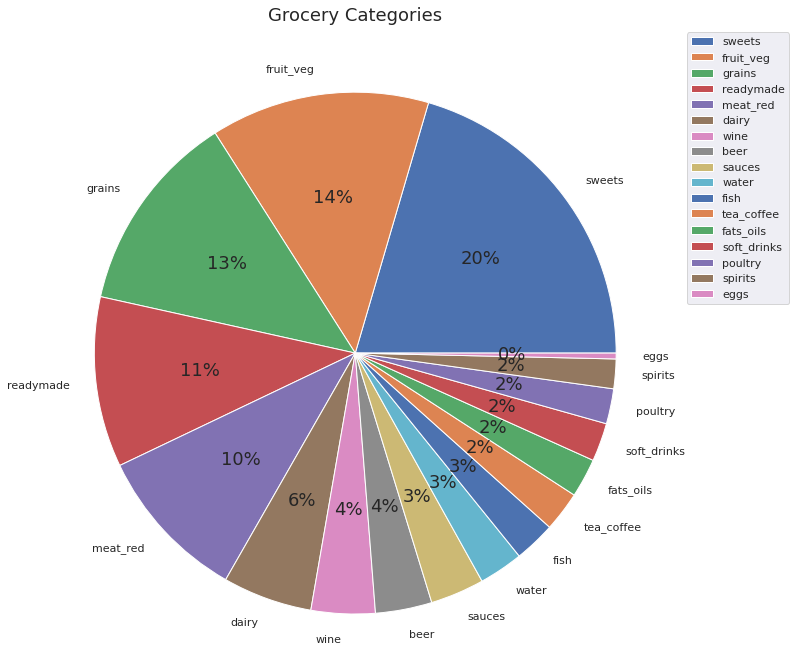

In [ ]:
food_cats_df['category'].value_counts().plot.pie(autopct='%1.0f%%',radius=3,ylabel='')
plt.title('Grocery Categories', y=2,fontsize=18)
plt.legend(cat_labels, bbox_to_anchor=(2,2))
plt.show()


In each LSOA, we consider two quantities: number of customers and number of residents. Their frequency distributions differ. So the author prepared a normalized representativeness parameter for each area that represents the ration between number of customers and residents of that area. The authors considered each person in the area will buy the needed grocery him self, so there is some potentiall gap between what really happens in the world and our data.

As authors mentioned in the paper we can consider not all areas
but only part of them to fine-tune the desired level of general population's representativeness. The higher it is, the more representative that area’s data is of the general population.

Here we will see the distribution of the LA areas representativeness


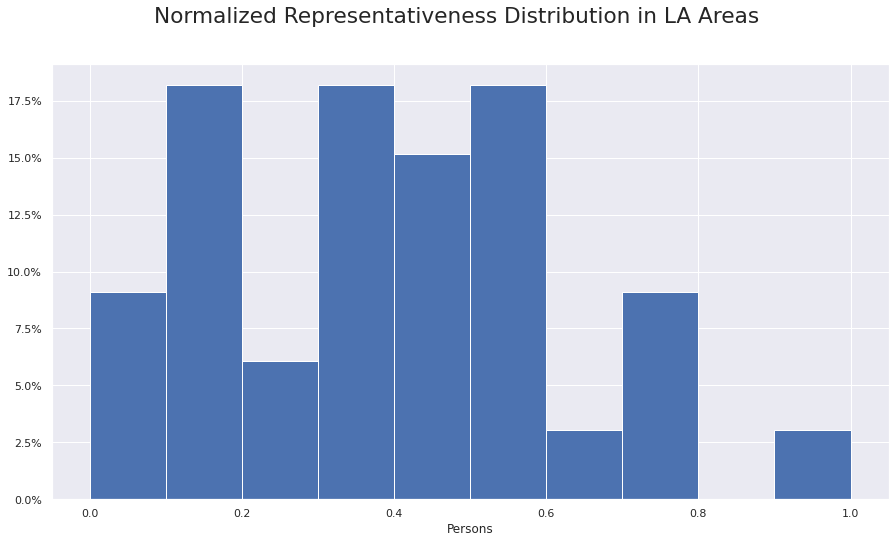

In [ ]:
from matplotlib.ticker import PercentFormatter

# Setup bins
no_bins = 10
no_data_points = la_y.shape[0]
la_y['representativeness_norm'].hist(bins=no_bins,figsize=(15,8),weights=np.ones(no_data_points) /no_data_points)
plt.suptitle('Normalized Representativeness Distribution in LA Areas')
plt.xlabel('Persons')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Now Let's see Ward areas representativness distribution. It is bell shaped with a little skew to the left.

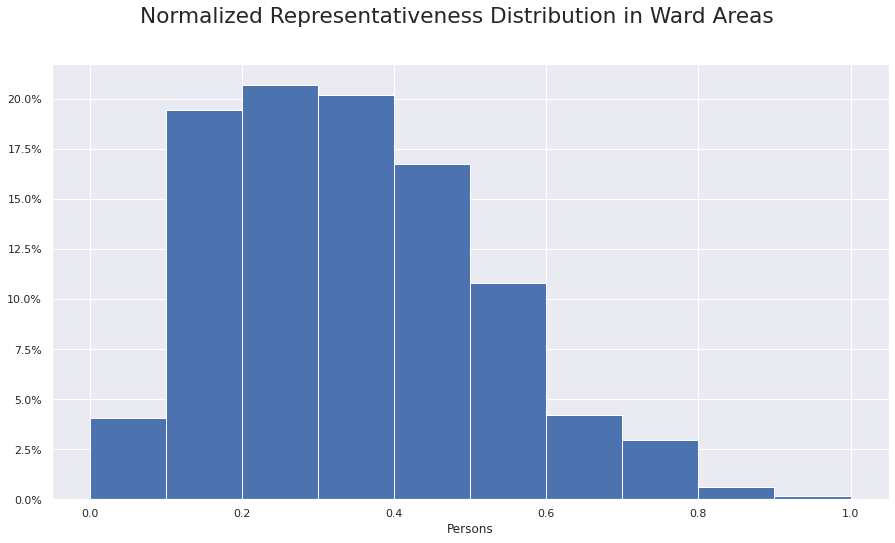

In [ ]:
# Setup bins
no_bins = 10
no_data_points = ward_y.shape[0]
ward_y['representativeness_norm'].hist(bins=no_bins,figsize=(15,8),weights=np.ones(no_data_points) /no_data_points)
plt.suptitle('Normalized Representativeness Distribution in Ward Areas')
plt.xlabel('Persons')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

The representativeness distribution of MSOA areas is the same as Ward areas with more skew to the left.

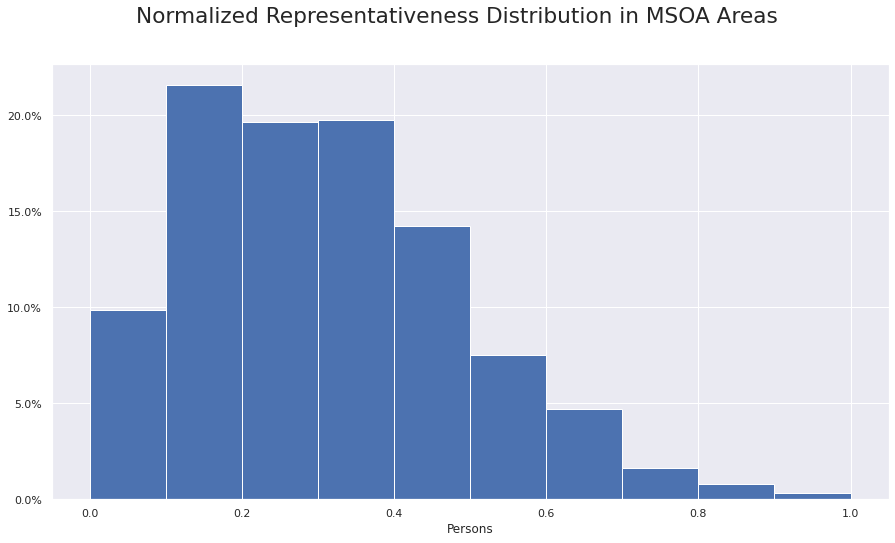

In [ ]:
# Setup bins
no_bins = 10
no_data_points = msoa_y.shape[0]
msoa_y['representativeness_norm'].hist(bins=no_bins,figsize=(15,8),weights=np.ones(no_data_points) /no_data_points)
plt.suptitle('Normalized Representativeness Distribution in MSOA Areas')
plt.xlabel('Persons')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

And finally there are many (about 20%) areas in LSOAs that does not use Tesco Grocery shops, since about 60% of data is for less than 0.2 representativeness.

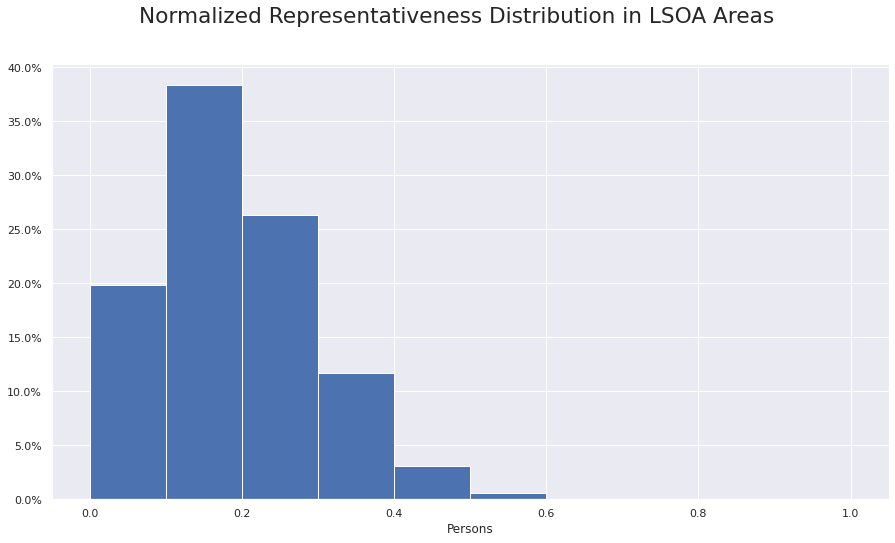

In [ ]:
# Setup bins
no_bins = 10
no_data_points = lsoa_y.shape[0]
lsoa_y['representativeness_norm'].hist(bins=no_bins,figsize=(15,8),weights=np.ones(no_data_points) /no_data_points)
plt.suptitle('Normalized Representativeness Distribution in LSOA Areas')
plt.xlabel('Persons')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

#### Popluation Distribution of Each Area Type.

Since we visualized the representativeness data over different area levels, it's a good time to see other population data distributions provided for each area.

Let's start with the biggest area type, LA.

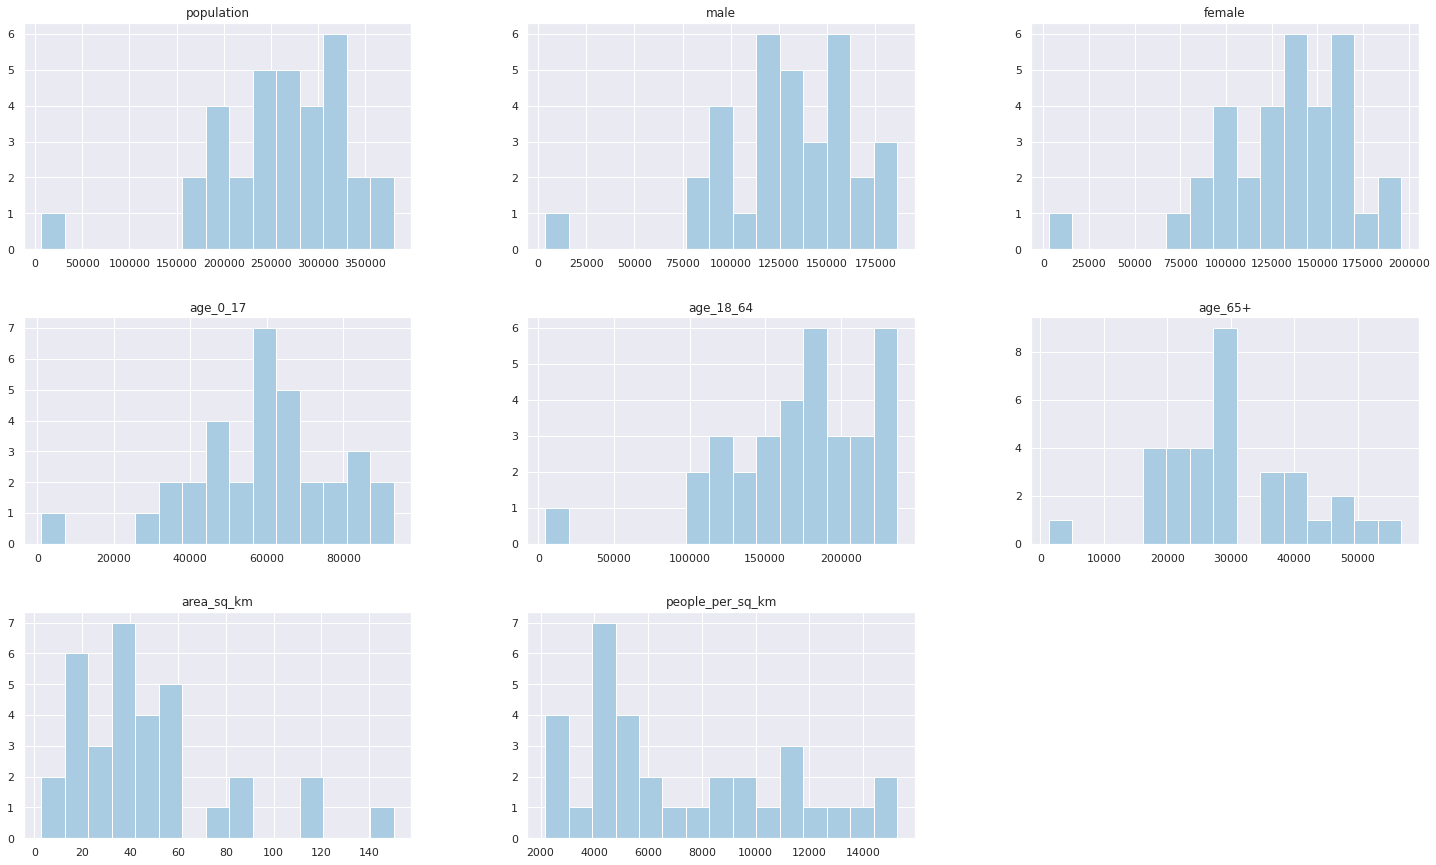

In [ ]:
population_la_df = la_y.loc[:, ['population', 'male', 'female', 'age_0_17', 'age_18_64', 'age_65+', 'area_sq_km', 'people_per_sq_km']]
color = '#a9cce3'
population_la_df.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.title("Population Over LA")
plt.show()

Here we have Ward areas population distributions.

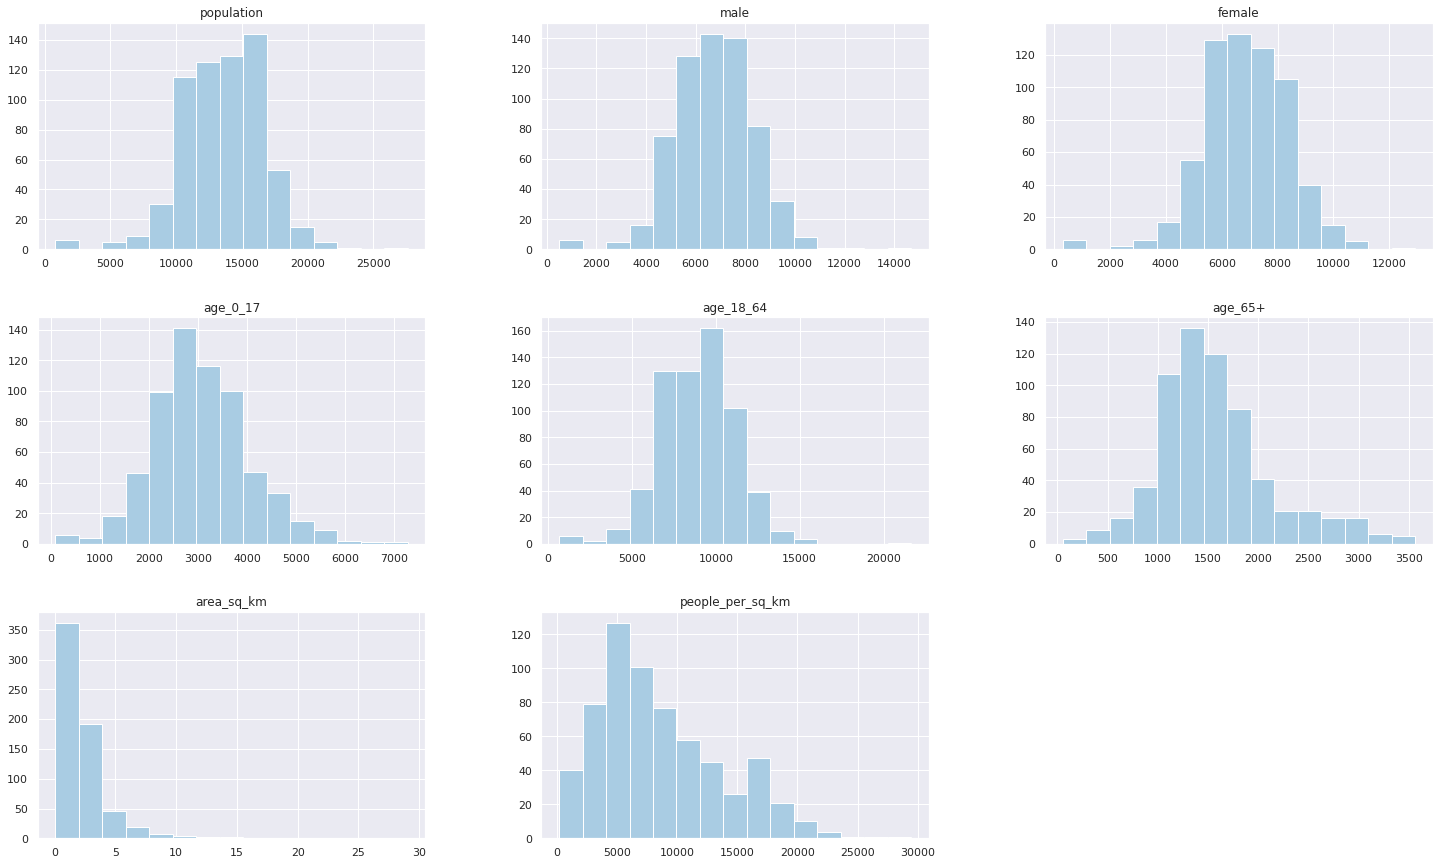

In [ ]:
population_la_df = ward_y.loc[:, ['population', 'male', 'female', 'age_0_17', 'age_18_64', 'age_65+', 'area_sq_km', 'people_per_sq_km']]
color = '#a9cce3'
population_la_df.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.title("Population Over Ward")
plt.show()

Now let us see how is population distribution over MSOA areas.

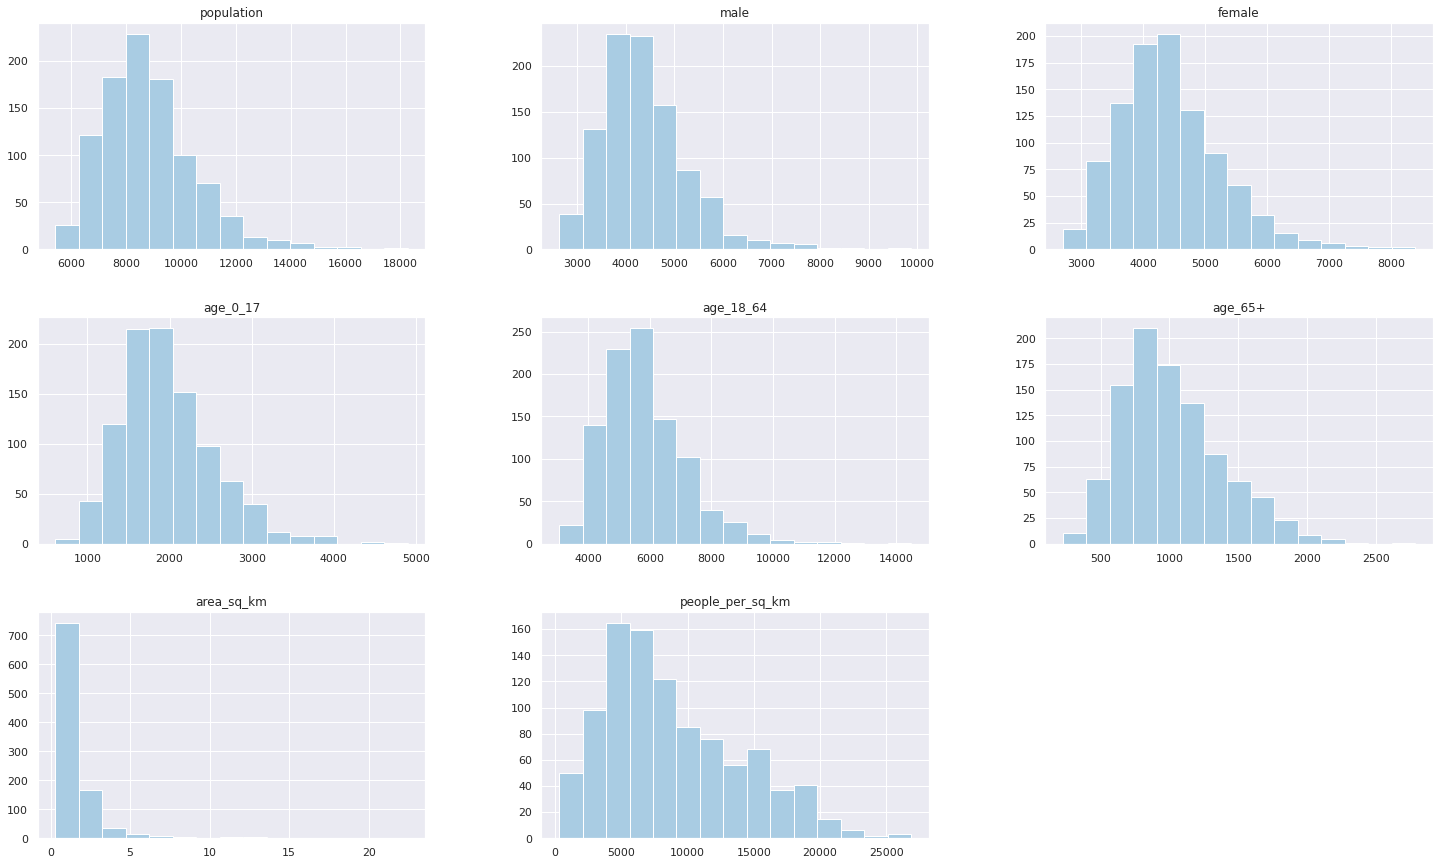

In [ ]:
population_la_df = msoa_y.loc[:, ['population', 'male', 'female', 'age_0_17', 'age_18_64', 'age_65+', 'area_sq_km', 'people_per_sq_km']]
color = '#a9cce3'
population_la_df.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.title("Population Over MSOA")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Finally, we have LSOA areas distributions.

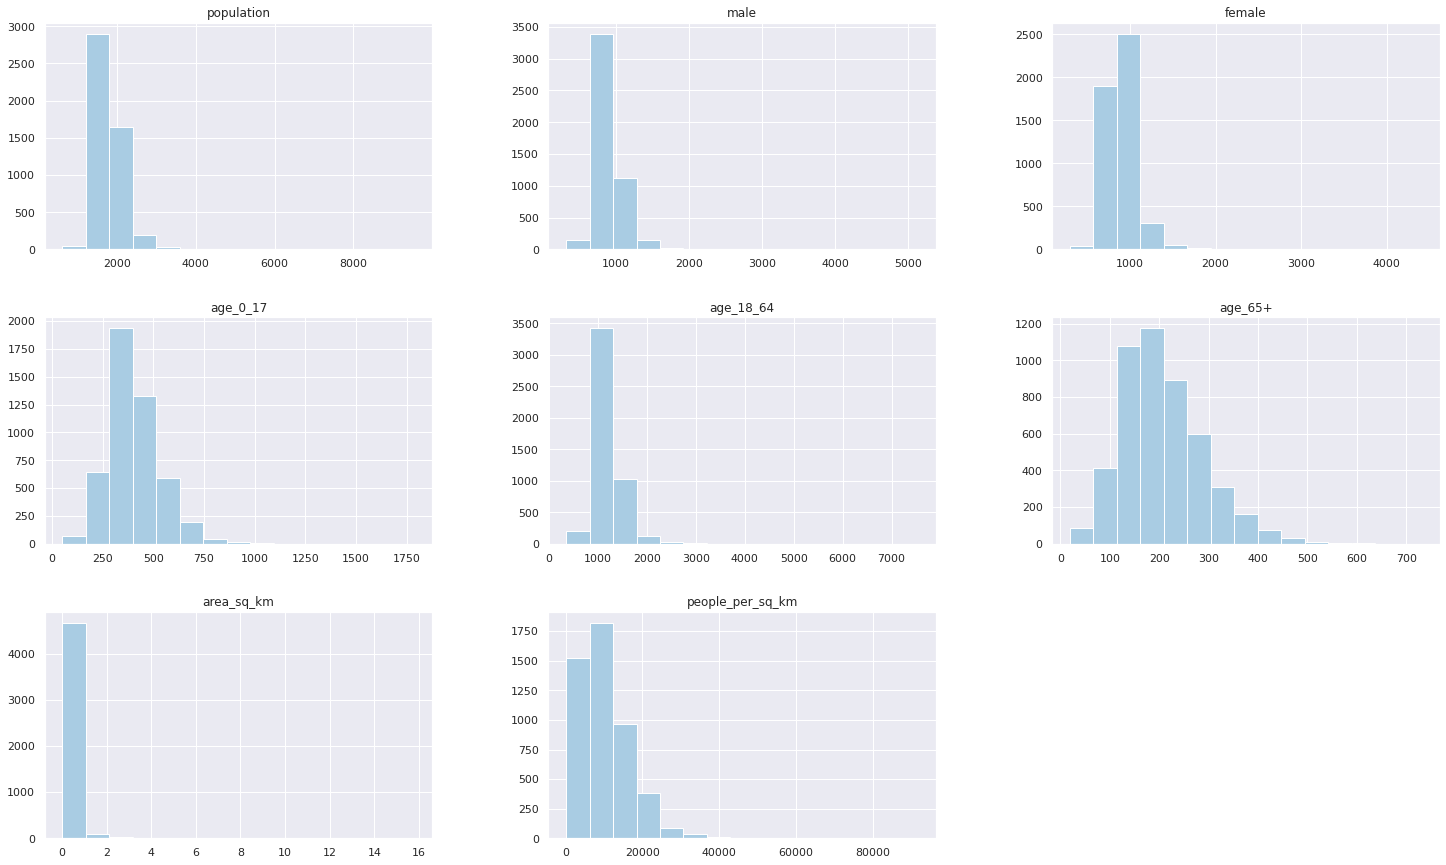

In [ ]:
population_lsoa_df = lsoa_y.loc[:, ['population', 'male', 'female', 'age_0_17', 'age_18_64', 'age_65+', 'area_sq_km', 'people_per_sq_km']]
color = '#a9cce3'
population_lsoa_df.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.title("Population Over LSOA")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

#### Health Data

In this part we will analyze the health data provided and also their correlation with other attributes of data. First we will see how nutrients all affected weihts in areas. We start with

In [ ]:
from scipy import stats

categories = ['f_healthy_weight',	'f_overweight',	'f_obese'	]
nutrients = ['fat', 'saturate', 'salt', 'sugar', 'protein', 'carb', 'fibre', 'alcohol', 'energy_tot']
corr_ranks = []
pvalues = []
for cat in categories:
  corr_rank = []
  p_value = []
  for nut in nutrients:
    r, p = stats.spearmanr(lnd_obs_la[cat], la_y[nut])
    corr_rank.append(r)
    p_value.append(p)
  corr_ranks.append(corr_rank)
  pvalues.append(p_value)

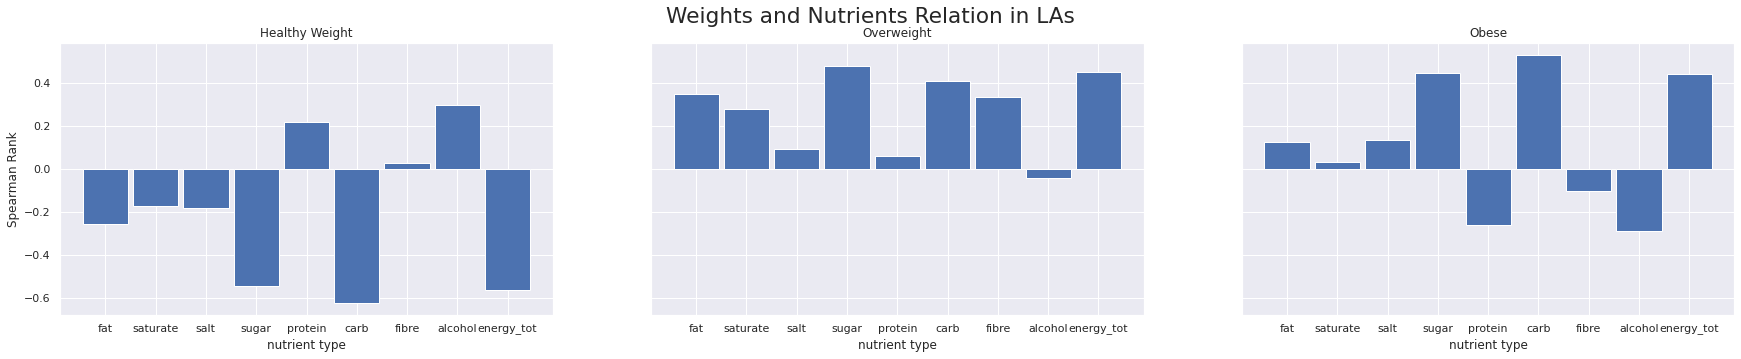

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(30,5))

fig.suptitle("Weights and Nutrients Relation in LAs")
axs[0].bar(nutrients, corr_ranks[0], width=0.9)
axs[0].set_title('Healthy Weight')
axs[0].set_ylabel('Spearman Rank')
axs[1].bar(nutrients, corr_ranks[1], width=0.9)
axs[1].set_title('Overweight')
axs[2].bar(nutrients, corr_ranks[2], width=0.9)
axs[2].set_title('Obese')

for ax in axs.flat:
    ax.set(xlabel='nutrient type')



Know let's see Diabetes status in Ward areas.

In [ ]:
categories = ['gp_patients_diabetes',	'estimated_diabetes_prevalence']
nutrients = ['fat', 'saturate', 'salt', 'sugar', 'protein', 'carb', 'fibre', 'alcohol', 'energy_tot']
corr_ranks = []
pvalues = []
for cat in categories:
  corr_rank = []
  p_value = []
  for nut in nutrients:
    r, p = stats.spearmanr(diabetes_ward[cat], ward_y[nut][:-1])
    corr_rank.append(r)
    p_value.append(p)
  corr_ranks.append(corr_rank)
  pvalues.append(p_value)



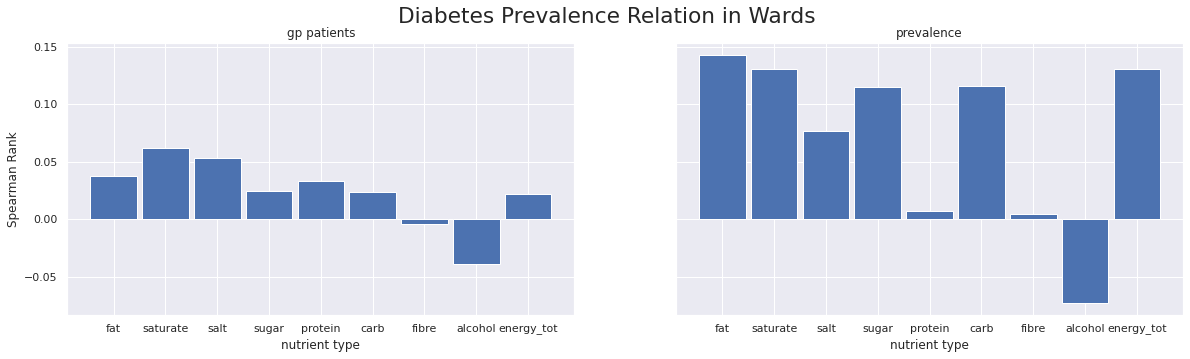

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20,5))

fig.suptitle("Diabetes Prevalence Relation in Wards")
axs[0].bar(nutrients, corr_ranks[0], width=0.9)
axs[0].set_title('gp patients')
axs[0].set_ylabel('Spearman Rank')
axs[1].bar(nutrients, corr_ranks[1], width=0.9)
axs[1].set_title('prevalence')


for ax in axs.flat:
    ax.set(xlabel='nutrient type')



Also we illustrate correlation matrix for LA ares.

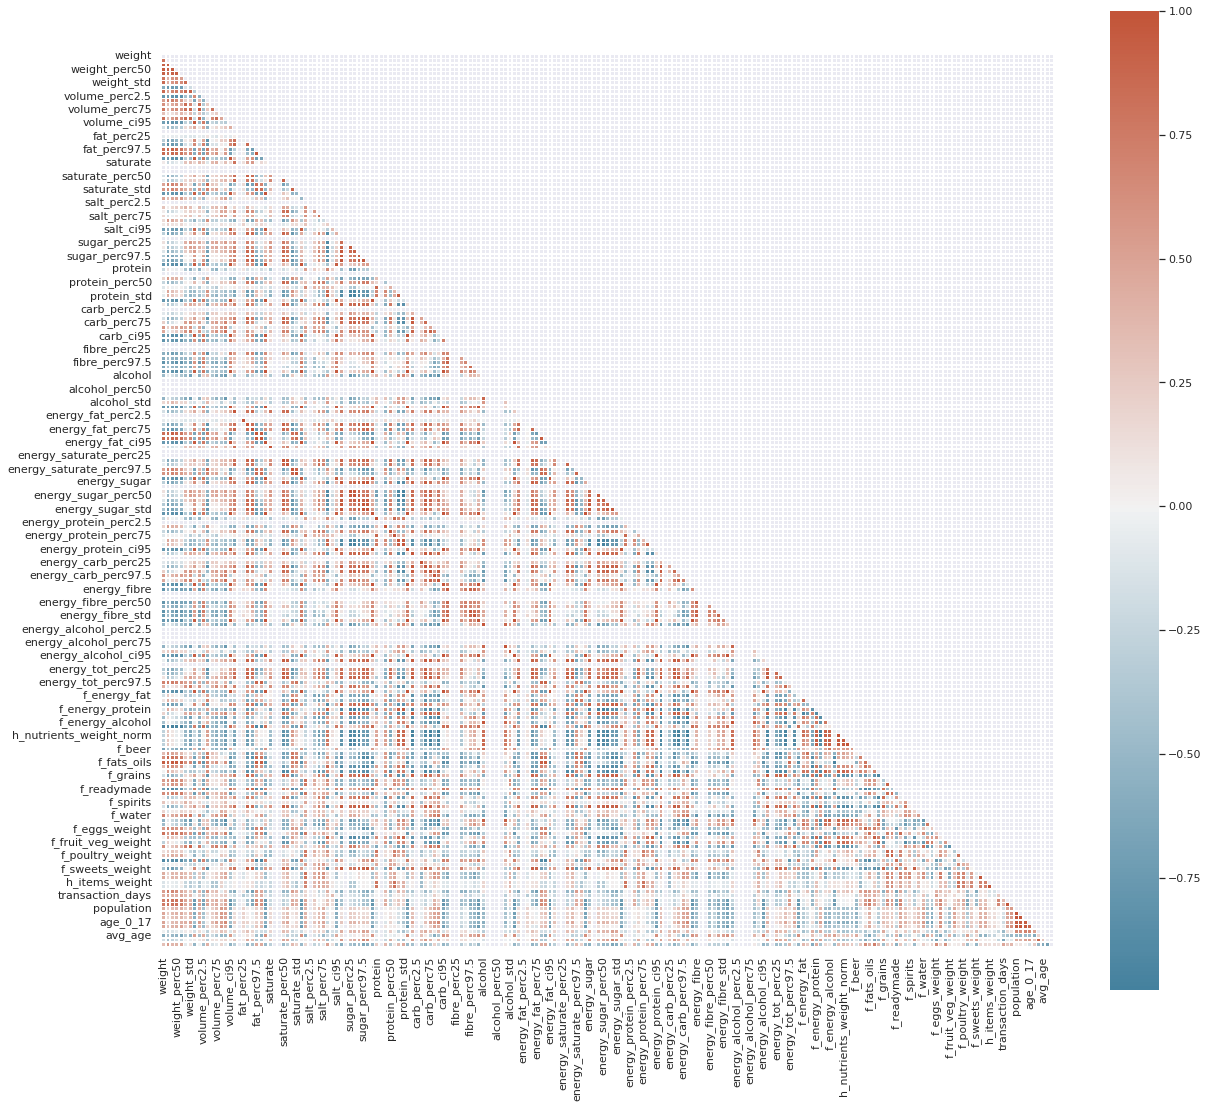

In [ ]:
corr=la_y.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(20,18))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr,cmap=cmap,mask=mask,linewidth=0.5,square=True,center=0)

## Feature Engineering



### Data Cleaning

As authors mentioned in the paper there are some columns demonstrating the data accompained with their standart deviation and some columns for percentiles. So we will drop them to improve our data.

The other important part in data cleaning section is to handeling **null** values. As we can see in the Loading dataset section, there is not any null value or outliers in the dataset. This resulted from brilliant data cleaning and a little feature engineering done by the authors. So we leave this section by only dropping unnecessary columns in the dataset.

In [ ]:
#@title Dropping columns list

drop_cols = ['weight_perc2.5', 'weight_perc25', 'weight_perc50', 'weight_perc75', 'weight_perc97.5', 'weight_ci95', 'weight_std']
drop_cols += ['volume_perc2.5', 'volume_perc25', 'volume_perc50', 'volume_perc75', 'volume_perc97.5', 'volume_ci95', 'volume_std']
drop_cols += ['fat_perc2.5', 'fat_perc25', 'fat_perc50', 'fat_perc75', 'fat_perc97.5', 'fat_ci95', 'fat_std']
drop_cols += ['saturate_perc2.5', 'saturate_perc25', 'saturate_perc50', 'saturate_perc75', 'saturate_perc97.5', 'saturate_ci95', 'saturate_std']
drop_cols += ['salt_perc2.5', 'salt_perc25', 'salt_perc50', 'salt_perc75', 'salt_perc97.5', 'salt_ci95', 'salt_std']
drop_cols += ['sugar_perc2.5', 'sugar_perc25', 'sugar_perc50', 'sugar_perc75', 'sugar_perc97.5', 'sugar_ci95', 'sugar_std']
drop_cols += ['protein_perc2.5', 'protein_perc25', 'protein_perc50', 'protein_perc75', 'protein_perc97.5', 'protein_ci95', 'protein_std']
drop_cols += ['carb_perc2.5', 'carb_perc25', 'carb_perc50', 'carb_perc75', 'carb_perc97.5', 'carb_ci95', 'carb_std']
drop_cols += ['fibre_perc2.5', 'fibre_perc25', 'fibre_perc50', 'fibre_perc75', 'fibre_perc97.5', 'fibre_ci95', 'fibre_std']
drop_cols += ['alcohol_perc2.5', 'alcohol_perc25', 'alcohol_perc50', 'alcohol_perc75', 'alcohol_perc97.5', 'alcohol_ci95', 'alcohol_std']
drop_cols += ['energy_fat_perc2.5', 'energy_fat_perc25', 'energy_fat_perc50', 'energy_fat_perc75', 'energy_fat_perc97.5', 'energy_fat_ci95', 'energy_fat_std']
drop_cols += ['energy_saturate_perc2.5', 'energy_saturate_perc25', 'energy_saturate_perc50', 'energy_saturate_perc75', 'energy_saturate_perc97.5', 'energy_saturate_ci95', 'energy_saturate_std']
drop_cols += ['energy_sugar_perc2.5', 'energy_sugar_perc25', 'energy_sugar_perc50', 'energy_sugar_perc75', 'energy_sugar_perc97.5', 'energy_sugar_ci95', 'energy_sugar_std']
drop_cols += ['energy_protein_perc2.5', 'energy_protein_perc25', 'energy_protein_perc50', 'energy_protein_perc75', 'energy_protein_perc97.5', 'energy_protein_ci95', 'energy_protein_std']
drop_cols += ['energy_carb_perc2.5', 'energy_carb_perc25', 'energy_carb_perc50', 'energy_carb_perc75', 'energy_carb_perc97.5', 'energy_carb_ci95', 'energy_carb_std']
drop_cols += ['energy_fibre_perc2.5', 'energy_fibre_perc25', 'energy_fibre_perc50', 'energy_fibre_perc75', 'energy_fibre_perc97.5', 'energy_fibre_ci95', 'energy_fibre_std']
drop_cols += ['energy_alcohol_perc2.5', 'energy_alcohol_perc25', 'energy_alcohol_perc50', 'energy_alcohol_perc75', 'energy_alcohol_perc97.5', 'energy_alcohol_ci95', 'energy_alcohol_std']
drop_cols += ['energy_tot_perc2.5', 'energy_tot_perc25', 'energy_tot_perc50', 'energy_tot_perc75', 'energy_tot_perc97.5', 'energy_tot_ci95', 'energy_tot_std']

# Also we can drop column that the normalized version of the data exists

drop_cols += ['h_nutrients_weight', 'h_nutrients_calories', 'h_items', 'h_items_weight']

In [ ]:
#@title Drop unncessary columns
lsoa_y.drop(columns=drop_cols, inplace=True)
msoa_y.drop(columns=drop_cols, inplace=True)
ward_y.drop(columns=drop_cols, inplace=True)
la_y.drop(columns=drop_cols, inplace=True)
print('LSOA annual dataframw shape: ', lsoa_y.shape)
print('MSOA annual dataframw shape: ', msoa_y.shape)
print('Ward annual dataframw shape: ', ward_y.shape)
print('LA annual dataframw shape: ', la_y.shape)

LSOA annual dataframw shape:  (4833, 72)
MSOA annual dataframw shape:  (983, 72)
Ward annual dataframw shape:  (638, 72)
LA annual dataframw shape:  (33, 72)


Now let's check column names again

In [ ]:
pp = pprint.PrettyPrinter(width=256, compact=True)
print("LSOA annual dataset columns: ")
pp.pprint(list(lsoa_y.columns))

LSOA annual dataset columns: 
['area_id', 'weight', 'volume', 'fat', 'saturate', 'salt', 'sugar', 'protein', 'carb', 'fibre', 'alcohol', 'energy_fat', 'energy_saturate', 'energy_sugar', 'energy_protein', 'energy_carb', 'energy_fibre', 'energy_alcohol', 'energy_tot', 'f_energy_fat',
 'f_energy_saturate', 'f_energy_sugar', 'f_energy_protein', 'f_energy_carb', 'f_energy_fibre', 'f_energy_alcohol', 'energy_density', 'h_nutrients_weight_norm', 'h_nutrients_calories_norm', 'f_beer', 'f_dairy', 'f_eggs', 'f_fats_oils', 'f_fish',
 'f_fruit_veg', 'f_grains', 'f_meat_red', 'f_poultry', 'f_readymade', 'f_sauces', 'f_soft_drinks', 'f_spirits', 'f_sweets', 'f_tea_coffee', 'f_water', 'f_wine', 'f_dairy_weight', 'f_eggs_weight', 'f_fats_oils_weight', 'f_fish_weight', 'f_fruit_veg_weight',
 'f_grains_weight', 'f_meat_red_weight', 'f_poultry_weight', 'f_readymade_weight', 'f_sauces_weight', 'f_sweets_weight', 'h_items_norm', 'h_items_weight_norm', 'representativeness_norm', 'transaction_days', 'num_tra

As data provider mentioned in the paper many normalization and min-max normalization have done over the dataset so we will continue on, and start learning models to predict diabetes status in each area.

## Data Preprocessing

In this section we separate the data to training and testing sets. Fortunately, we have a clean data set so applying min max scaler or normalization are unnecessary.

Know we want to split the data. Before that, we need to merge Ward datasets and then separate them.

In [ ]:
ward_df = ward_y.merge(diabetes_ward, how='inner')
ward_df.shape

(547, 75)

In [ ]:
y = ward_df.pop('estimated_diabetes_prevalence')
area_id = ward_df.pop('area_id')

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(ward_df,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(437, 73)
(110, 73)


## Regression and Learning


### Regenerate paper results
In this section we regenerate the paper results and then trying to use some other approches to do the task better. So, we will regenerate the paper results by using linear regression on four important features to predict diabetes prevelance in the Ward.

Set files path as a base directory.

In [ ]:
import os
os.environ['BASE_DIR'] = "/content/drive/My Drive/Datasets/TescoGrocery/area"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Datasets/TescoGrocery/area

/content/drive/My Drive/Datasets/TescoGrocery/area


In [ ]:
#@title Install PyMC Package
! pip install pymc3

clear_output()
print("Done!")

Done!


In [ ]:
#@title Setup Packages

import scipy
from scipy.stats import norm
import arviz as az
import pymc3 as pm

PyMC package is a Python package for Bayesian statistical modeling and probabilistic machine learning which focuses on advanced Markov chain Monte Carlo and variational fitting algorithms.

In [ ]:
#@title Correlations Function
def correlations():

    # Load nutrition data
    df_tesco_msoa = pd.read_csv('year_msoa_grocery.csv', encoding='utf-8', header=0)
    df_tesco_ward = pd.read_csv('year_osward_grocery.csv', encoding='utf-8', header=0)
    df_tesco_oslaua = pd.read_csv('year_borough_grocery.csv', encoding='utf-8', header=0)

    # Load health data
    df_child_obesity_ward = pd.read_csv('child_obesity_london_ward_2013-2014.csv', encoding='utf-8', header=0).dropna()
    df_child_obesity_oslaua = pd.read_csv('child_obesity_london_oslaua_2015-2016.csv', encoding='utf-8', header=0).dropna()
    df_adult_obesity_oslaua = pd.read_csv('london_obesity_oslaua_2012.csv', encoding='utf-8', header=0).dropna()
    df_adult_obesity_hospital_oslaua = pd.read_csv('obesity_hospitalization_oslaua_2016.csv', encoding='utf-8',
                                                   header=0).dropna()
    df_diabetes_ward = pd.read_csv('diabetes_estimates_osward_2016.csv', encoding='utf-8', header=0).dropna()

    outfile = open('correlations_health_outcomes.csv', 'wt', encoding='utf-8')
    outfile.write('outcome,nutrient,r,p\n')

    food_indicators = ['energy_tot', 'energy_fat', 'energy_saturate', 'energy_sugar', 'energy_protein', 'energy_carb',
                       'energy_fibre', 'h_nutrients_calories_norm']
    food_indicators_labels = ['energy', 'fat', 'saturate', 'sugar', 'protein', 'carb', 'fibre', 'diversity']

    # Correlation with child obesity at Ward level
    df_join = df_tesco_ward.merge(df_child_obesity_ward, how='inner')
    plot_labels = ['Prevalence of overweight\nchildren (reception)', 'Prevalence of overweight\nchildren (year 6)',
                   'Prevalence of obese\nchildren (reception)', 'Prevalence of obese\nchildren (year 6)']
    # outcomes = ['f_overweight_5y', 'f_overweight_11y', 'f_obese_5y', 'f_obese_11y']
    outcomes = ['prevalence_overweight_reception', 'prevalence_overweight_y6', 'prevalence_obese_reception', 'prevalence_obese_y6']


    for b, lab in zip(outcomes, plot_labels):
        correl = []
        nutrient = []
        for a, al in zip(food_indicators, food_indicators_labels):
            r, p = scipy.stats.spearmanr(df_join[a], df_join[b])
            if p < 0.05:
                outfile.write('%s,%s,%s,%s\n' % (b, al, r, p))
                correl.append(r)
                nutrient.append(al)

    # Correlation with adult obesity
    df_join = df_tesco_oslaua.merge(df_adult_obesity_oslaua, how='inner')
    plot_labels = ['Prevalence of\noverweight adults', 'Prevalence of\nobese adults']
    outcomes = ['f_overweight', 'f_obese']
    for b, lab in zip(outcomes, plot_labels):
        correl = []
        nutrient = []
        for a, al in zip(food_indicators, food_indicators_labels):
            r, p = scipy.stats.spearmanr(df_join[a], df_join[b])
            if p < 0.05:
                # print(b,al,r,p)
                outfile.write('%s,%s,%s,%s\n' % (b, al, r, p))
                correl.append(r)
                nutrient.append(al)

    # Correlation with diabetes estimates
    df_join_diabetes = df_tesco_ward.merge(df_diabetes_ward, how='inner')
    plot_labels = ['Diabetes\nprevalence']
    outcomes = ['estimated_diabetes_prevalence']
    for b, lab in zip(outcomes, plot_labels):
        correl = []
        nutrient = []
        for a, al in zip(food_indicators, food_indicators_labels):
            r, p = scipy.stats.spearmanr(df_join_diabetes[a], df_join_diabetes[b])
            if p < 0.05:
                # print(b,al,r,p)
                outfile.write('%s,%s,%s,%s\n' % (b, al, r, p))
                correl.append(r)
                nutrient.append(al)

    outfile.close()

In [ ]:
#@title Regression Function

def bayesian_regression():
    df_grocery = pd.read_csv('year_ward_grocery.csv')
    df_grocery['female_perc'] = df_grocery.apply(lambda row: row['female'] / row['population'], axis=1)
    df_diabetes = pd.read_csv('diabetes_estimates_osward_2016.csv', encoding='utf-8', header=0).dropna()
    df_geo = pd.read_csv('london_pcd2geo_2015.csv', encoding='utf-8')
    df_geo = df_geo[['osward','oslaua']]
    df_geo = df_geo.drop_duplicates()

    df = df_grocery.merge(df_diabetes, how='inner', left_on='area_id', right_on='area_id')
    df = df.merge(df_geo, how='inner', left_on='area_id', right_on='osward')

    plt.figure(figsize=(8, 8))
    plt.plot(df['energy_carb'], df['estimated_diabetes_prevalence'], 'bo')
    plt.xlabel(f'energy_carb', size = 18)
    plt.ylabel(f'estimated_diabetes_prevalence', size = 18)

    X1=df['energy_carb'].values
    X2=df['h_nutrients_calories_norm'].values
    X3=df['avg_age'].values
    X4=df['female_perc'].values
    X5=df['num_transactions'].values
    X6=df['people_per_sq_km'].values

    X5 = np.array([np.log2(x) for x in X5])
    X6 = np.array([np.log2(x) for x in X6])

    Y=df['estimated_diabetes_prevalence'].values

    oslaua2index = {}
    i=0
    for v in df['oslaua'].values:
        if v not in oslaua2index:
            oslaua2index[v]=i
            i += 1

    df['oslaua_idx'] = df.apply(lambda row : oslaua2index[row['oslaua']], axis=1)

    n_oslauas = n_counties = len(df['oslaua_idx'].unique())
    oslaua_idx = df['oslaua_idx'].values

    hierarchical_model = pm.Model()
    with hierarchical_model:
        # Hyperpriors for group nodes
        mu_a = pm.Normal('mu_a', mu=0., sigma=100)
        sigma_a = pm.HalfNormal('sigma_a', 5.)
        a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=n_oslauas)

        mu_b1 = pm.Normal('mu_b1', mu=0., sigma=100)
        sigma_b1 = pm.HalfNormal('sigma_b1', 5.)
        b1 = pm.Normal('b1', mu=mu_b1, sigma=sigma_b1, shape=n_oslauas)

        mu_b2 = pm.Normal('mu_b2', mu=0., sigma=100)
        sigma_b2 = pm.HalfNormal('sigma_b2', 5.)
        b2 = pm.Normal('b2', mu=mu_b2, sigma=sigma_b2, shape=n_oslauas)

        mu_b3 = pm.Normal('mu_b3', mu=0., sigma=100)
        sigma_b3 = pm.HalfNormal('sigma_b3', 5.)
        b3 = pm.Normal('b3', mu=mu_b3, sigma=sigma_b3, shape=n_oslauas)

        mu_b4 = pm.Normal('mu_b4', mu=0., sigma=100)
        sigma_b4 = pm.HalfNormal('sigma_b4', 5.)
        b4 = pm.Normal('b4', mu=mu_b4, sigma=sigma_b4, shape=n_oslauas)

        mu_b5 = pm.Normal('mu_b5', mu=0., sigma=100)
        sigma_b5 = pm.HalfNormal('sigma_b5', 5.)
        b5 = pm.Normal('b5', mu=mu_b5, sigma=sigma_b5, shape=n_oslauas)

        mu_b6 = pm.Normal('mu_b6', mu=0., sigma=100)
        sigma_b6 = pm.HalfNormal('sigma_b6', 5.)
        b6 = pm.Normal('b6', mu=mu_b6, sigma=sigma_b6, shape=n_oslauas)

        # Model error
        eps = pm.HalfCauchy('eps', 5.)

        estimate = a[oslaua_idx] + b1[oslaua_idx]*X1 + b2[oslaua_idx]*X2 + b3[oslaua_idx]*X3 + b4[oslaua_idx]*X4 + b5[oslaua_idx]*X5 + b6[oslaua_idx]*X6

        # Likelihood (sampling distribution) of observations
        likelihood = pm.Normal('likelihood', mu=estimate, sigma=eps, observed=Y)

        hierarchical_trace = pm.sample(10000, tune=10000, target_accept=.9)

    ppc = pm.sample_posterior_predictive(hierarchical_trace, samples=10000, model=hierarchical_model)
    np.asarray(ppc['likelihood']).shape
    print(az.r2_score(Y, ppc['likelihood']))

LSOA annual dataset columns: 
['area_id', 'weight', 'weight_perc2.5', 'weight_perc25', 'weight_perc50', 'weight_perc75', 'weight_perc97.5', 'weight_std', 'weight_ci95', 'volume', 'volume_perc2.5', 'volume_perc25', 'volume_perc50', 'volume_perc75', 'volume_perc97.5', 'volume_std',
 'volume_ci95', 'fat', 'fat_perc2.5', 'fat_perc25', 'fat_perc50', 'fat_perc75', 'fat_perc97.5', 'fat_std', 'fat_ci95', 'saturate', 'saturate_perc2.5', 'saturate_perc25', 'saturate_perc50', 'saturate_perc75', 'saturate_perc97.5', 'saturate_std',
 'saturate_ci95', 'salt', 'salt_perc2.5', 'salt_perc25', 'salt_perc50', 'salt_perc75', 'salt_perc97.5', 'salt_std', 'salt_ci95', 'sugar', 'sugar_perc2.5', 'sugar_perc25', 'sugar_perc50', 'sugar_perc75', 'sugar_perc97.5', 'sugar_std', 'sugar_ci95',
 'protein', 'protein_perc2.5', 'protein_perc25', 'protein_perc50', 'protein_perc75', 'protein_perc97.5', 'protein_std', 'protein_ci95', 'carb', 'carb_perc2.5', 'carb_perc25', 'carb_perc50', 'carb_perc75', 'carb_perc97.5', 'car

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:pymc3:There were 1028 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 2375 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


r2        0.708385
r2_std    0.016726
dtype: float64


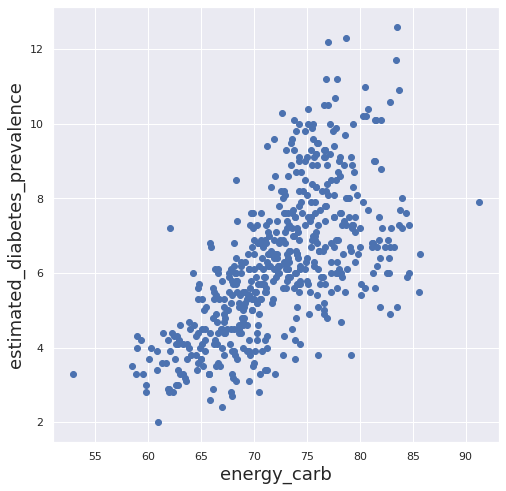

In [ ]:
correlations()

bayesian_regression()

### Linear regression

Now we use other given parameters with linear regression.


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

weights_linear = model.coef_

Now that our regression model is complete, let's check its score on the test set:

In [ ]:
def cap_vector(input_vec,max_val,min_val):
  output_vec = np.maximum(min_val,input_vec)   # We added np.maximum to filter irrelevant predictions
  output_vec = np.minimum(max_val,output_vec)   # We added np.maximum to filter irrelevant predictions

  return output_vec

In [ ]:
predicted_prevalence_train = cap_vector(model.predict(X_train),100000,0)   # We added np.maximum to filter irrelevant predictions
predicted_prevalence_test = cap_vector(model.predict(X_test),100000,0)

Now let's calculate the accuracy of our model, using the measures we learned last session:

In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE on the train set is: %.2f GBP' %pow(mean_squared_error(y_train,predicted_prevalence_train),.5))
print('RMSE on the test set is: %.2f GBP' %pow(mean_squared_error(y_test,predicted_prevalence_test),0.5))

RMSE on the train set is: 0.32 GBP
RMSE on the test set is: 0.45 GBP


In [ ]:
from sklearn.metrics import mean_absolute_error
MAE_train = mean_absolute_error(y_train, predicted_prevalence_train)
MAE_test = mean_absolute_error(y_test, predicted_prevalence_test)

print('MAE on the train set is %.2f GPB' %MAE_train)
print('MAE on the test set is %.2f GPB' %MAE_test)

MAE on the train set is 0.23 GPB
MAE on the test set is 0.28 GPB


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE_train = mean_absolute_percentage_error(y_train, predicted_prevalence_train)
MAPE_test = mean_absolute_percentage_error(y_test, predicted_prevalence_test)
print('MAPE on the train set is %.3f' %MAPE_train)
print('MAPE on the test set is %.3f' %MAPE_test)

MAPE on the train set is 0.042
MAPE on the test set is 0.050


And finall, the $R^2$ score is:

In [ ]:
from sklearn.metrics import r2_score
R2_score_test = r2_score(y_test, predicted_prevalence_test)
print('R2 Score is %.3f' %R2_score_test)

R2 Score is 0.947


Finally let's illustrate the prdicted values and real values in a plot. Before that we need to give entire data to the model.

In [ ]:
preds = cap_vector(model.predict(ward_df),100000,0)

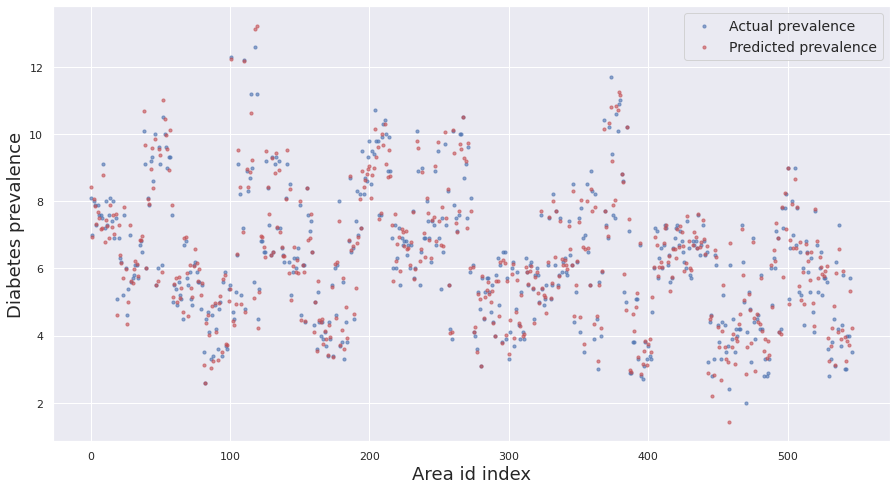

In [ ]:
plt.figure(figsize=(15,8))
x = np.arange(0,len(y),1)
plt.scatter(x,y,c='b',s=10,alpha=0.6)
plt.scatter(x,preds,c='r',s=10,alpha=0.6)
plt.legend(['Actual prevalence','Predicted prevalence'],fontsize=14)
plt.ylabel('Diabetes prevalence',fontsize=18)
plt.xlabel('Area id index',fontsize=18)
plt.show()

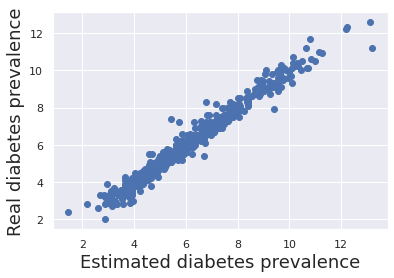

In [ ]:
plt.scatter(preds, y)
plt.ylabel('Real diabetes prevalence',fontsize=18)
plt.xlabel('Estimated diabetes prevalence',fontsize=18)
plt.show()

### LASSO Regression
If we put a penalty on the absolute value of weights, instead of their squared value, we will have LASSO regression:

$\min_{w} \sum_{i=1}^n (y_i - X\cdot w)^2 + \alpha \sum_{j=1}^k |w_j|$

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=100)
model.fit(X_train, y_train)

Lasso(alpha=100)

In [ ]:
predicted_prevalence_train = model.predict(X_train)
predicted_prevalence_test = model.predict(X_test)

In [ ]:
MAPE_train = mean_absolute_percentage_error(y_train, predicted_prevalence_train)
MAPE_test = mean_absolute_percentage_error(y_test, predicted_prevalence_test)
print('MAPE on the train set is %.3f' %MAPE_train)
print('MAPE on the test set is %.3f' %MAPE_test)

MAPE on the train set is 0.093
MAPE on the test set is 0.103


In [ ]:
weights = model.coef_
print('Non-zero weights in Lasso regression %d' %(sum(weights!=0)))
print('Non-zero weights in linear regression %d' %(sum(weights_linear!=0)))

Non-zero weights in Lasso regression 6
Non-zero weights in linear regression 73


And finall, the $R^2$ score is:

In [ ]:
from sklearn.metrics import r2_score
R2_score_test = r2_score(y_test, predicted_prevalence_test)
print('R2 Score is %.3f' %R2_score_test)

R2 Score is 0.880


In [ ]:
preds = cap_vector(model.predict(ward_df),100000,0)

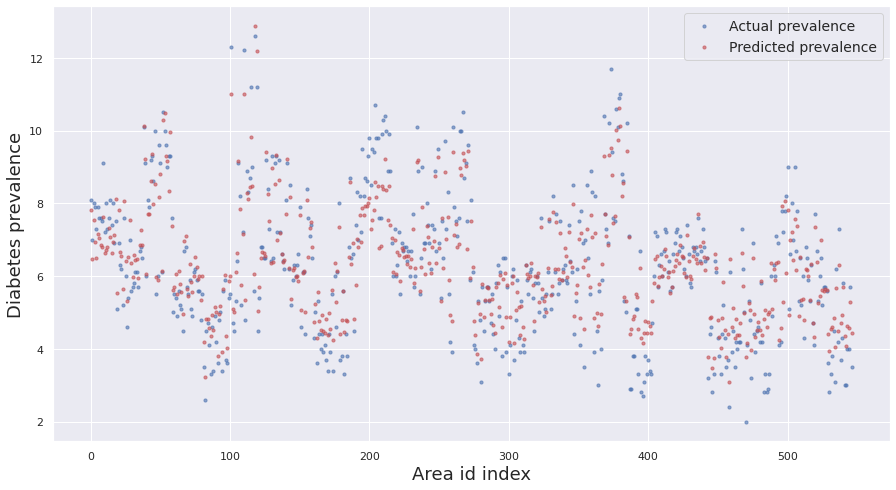

In [ ]:
plt.figure(figsize=(15,8))
x = np.arange(0,len(y),1)
plt.scatter(x,y,c='b',s=10,alpha=0.6)
plt.scatter(x,preds,c='r',s=10,alpha=0.6)
plt.legend(['Actual prevalence','Predicted prevalence'],fontsize=14)
plt.ylabel('Diabetes prevalence',fontsize=18)
plt.xlabel('Area id index',fontsize=18)
plt.show()

Know we want to see correlation between predicted values and real prevalence.

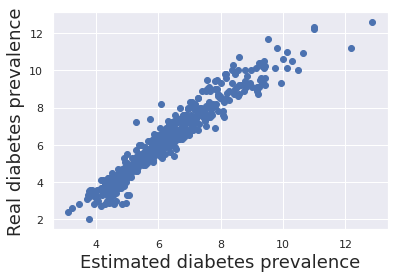

In [ ]:
plt.scatter(preds, y)
plt.ylabel('Real diabetes prevalence',fontsize=18)
plt.xlabel('Estimated diabetes prevalence',fontsize=18)
plt.show()

## Conclusion

Finally, in this report we illustrated some aspects of data and visualized some features to get better insight. In the future we will add ML methods to predict diabetes status in each area.